# Detecting COVID-19 with Chest X Ray using Keras¶
Image classification of Chest X Rays in one of two classes: Normal or COVID-19

Dataset from COVID-19 Radiography Dataset on Kaggle


In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow.compat.v1 as tf
sess = tf.Session()

In [17]:
# Set a seed value
seed_value= 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
#tf.random.set_seed(seed_value)
tf.random.set_random_seed(42)

# 5. For layers that introduce randomness like dropout, make sure to set seed values 
#model.add(Dropout(0.25, seed=seed_value))

#6 Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [18]:
## Set file paths to image files
project_path = "/Users/abukar/DeepLearning_CNN_Project/"
train_path = project_path + "/chest_xray_classification2/train/"
val_path = project_path + "/chest_xray_classification2/val/"
test_path = project_path + "/chest_xray_classification2/test/"

## Set up hyperparameters that will be used later
hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 100
hyper_channels = 1
hyper_mode = 'grayscale'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 


train_generator = train_datagen.flow_from_directory(directory = train_path, 
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size, 
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary', 
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()

Found 3219 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Found 681 images belonging to 2 classes.


In [19]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit_generator(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 200, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/200
26/26 - 10s - loss: 0.6651 - auc_1: 0.6147 - val_loss: 0.5464 - val_auc_1: 0.7566
Epoch 2/200
26/26 - 8s - loss: 0.6005 - auc_1: 0.7288 - val_loss: 0.6605 - val_auc_1: 0.7868
Epoch 3/200
26/26 - 8s - loss: 0.5402 - auc_1: 0.7975 - val_loss: 0.6327 - val_auc_1: 0.7945
Epoch 4/200
26/26 - 9s - loss: 0.5288 - auc_1: 0.8035 - val_loss: 0.5835 - val_auc_1: 0.8271
Epoch 5/200
26/26 - 9s - loss: 0.4862 - auc_1: 0.8406 - val_loss: 0.6361 - val_auc_1: 0.8487
Epoch 6/200
26/26 - 9s - loss: 0.4861 - auc_1: 0.8391 - val_loss: 0.5446 - val_auc_1: 0.8641
Epoch 7/200
26/26 - 9s - loss: 0.4610 - auc_1: 0.8577 - val_loss: 0.4605 - val_auc_1: 0.8684
Epoch 8/200
26/26 - 9s - loss: 0.4402 - auc_1: 0.8734 - val_loss: 0.3439 - val_auc_1: 0.8979
Epoch 9/200
26/26 - 9s - loss: 0.4120 - auc_1: 0.8885 - val_loss: 0.3734 - val_auc_1: 0.9031
Epoch 10/200
26/26 - 9s - loss: 0.4059 - auc_1: 0.8920 - val_loss: 0.3621 - val_auc_1: 0.9026
Epoch 11/200
26/26 - 8s - loss: 0.3966 - auc_1: 0.8973 - val_loss: 0

Epoch 89/200
26/26 - 8s - loss: 0.1673 - auc_1: 0.9823 - val_loss: 0.1124 - val_auc_1: 0.9937
Epoch 90/200
26/26 - 8s - loss: 0.1483 - auc_1: 0.9865 - val_loss: 0.1067 - val_auc_1: 0.9933
Epoch 91/200
26/26 - 8s - loss: 0.1418 - auc_1: 0.9871 - val_loss: 0.1073 - val_auc_1: 0.9936
Epoch 92/200
26/26 - 8s - loss: 0.1476 - auc_1: 0.9856 - val_loss: 0.1306 - val_auc_1: 0.9848
Epoch 93/200
26/26 - 8s - loss: 0.1527 - auc_1: 0.9853 - val_loss: 0.1151 - val_auc_1: 0.9894
Epoch 94/200
26/26 - 8s - loss: 0.1433 - auc_1: 0.9868 - val_loss: 0.1866 - val_auc_1: 0.9924
Epoch 95/200
26/26 - 8s - loss: 0.1545 - auc_1: 0.9848 - val_loss: 0.1654 - val_auc_1: 0.9960
Epoch 96/200
26/26 - 8s - loss: 0.1466 - auc_1: 0.9865 - val_loss: 0.1458 - val_auc_1: 0.9930
Epoch 97/200
26/26 - 8s - loss: 0.1355 - auc_1: 0.9881 - val_loss: 0.2109 - val_auc_1: 0.9924
Epoch 98/200
26/26 - 8s - loss: 0.1603 - auc_1: 0.9837 - val_loss: 0.1566 - val_auc_1: 0.9956
Epoch 99/200
26/26 - 8s - loss: 0.1399 - auc_1: 0.9880 - val

Epoch 176/200
26/26 - 9s - loss: 0.0812 - auc_1: 0.9959 - val_loss: 0.1250 - val_auc_1: 0.9899
Epoch 177/200
26/26 - 9s - loss: 0.0874 - auc_1: 0.9944 - val_loss: 0.0589 - val_auc_1: 0.9976
Epoch 178/200
26/26 - 9s - loss: 0.0672 - auc_1: 0.9971 - val_loss: 0.0647 - val_auc_1: 0.9960
Epoch 179/200
26/26 - 9s - loss: 0.0623 - auc_1: 0.9973 - val_loss: 0.0345 - val_auc_1: 0.9992
Epoch 180/200
26/26 - 9s - loss: 0.0596 - auc_1: 0.9980 - val_loss: 0.0485 - val_auc_1: 0.9985
Epoch 181/200
26/26 - 9s - loss: 0.0641 - auc_1: 0.9976 - val_loss: 0.0686 - val_auc_1: 0.9972
Epoch 182/200
26/26 - 9s - loss: 0.0683 - auc_1: 0.9964 - val_loss: 0.0648 - val_auc_1: 0.9968
Epoch 183/200
26/26 - 9s - loss: 0.0648 - auc_1: 0.9975 - val_loss: 0.1015 - val_auc_1: 0.9934
Epoch 184/200
26/26 - 9s - loss: 0.0756 - auc_1: 0.9960 - val_loss: 0.0781 - val_auc_1: 0.9972
Epoch 185/200
26/26 - 9s - loss: 0.0672 - auc_1: 0.9969 - val_loss: 0.0672 - val_auc_1: 0.9994
Epoch 186/200
26/26 - 9s - loss: 0.0604 - auc_1: 0

In [26]:
def create_charts(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
   
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator.classes
    Y_pred = cnn.predict_generator(test_generator, steps = len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    y_pred_prob = Y_pred.T[0]
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)


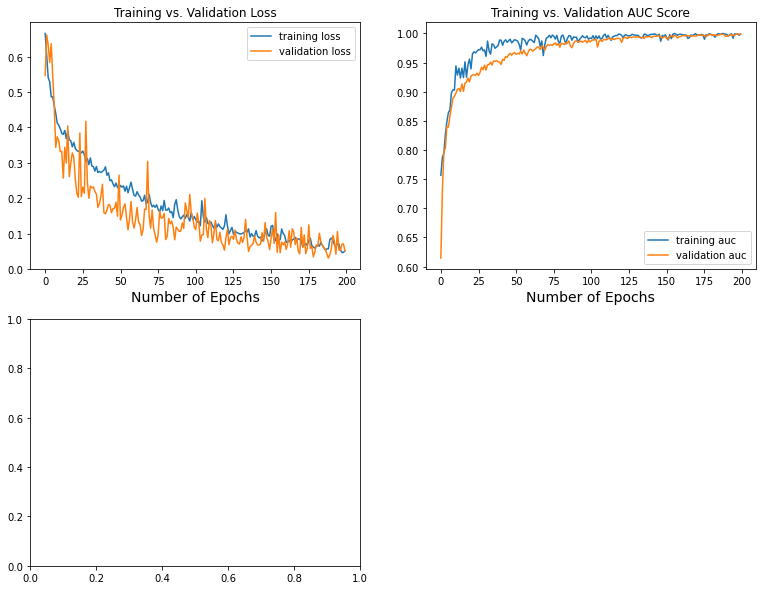

In [30]:

create_charts(cnn, cnn_model)

# Covid-19 Xray Images

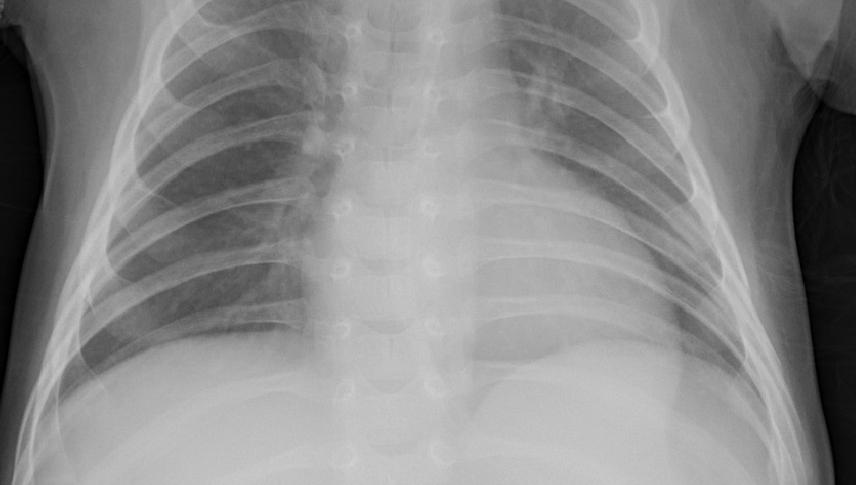